# Linear Regression
University of Denver

Makarand Nadendla

In [221]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import numpy as np 
import pandas as pd 
%matplotlib inline

In [152]:
df_health = pd.read_csv("Health_Data.csv")

# scale the data
scaler = StandardScaler()
df_health[["age","income","illness","reduced"]] = scaler.fit_transform(df_health[["age","income","illness","reduced"]])

In [5]:
# initialize hyperparameters

b0 = 0
b1 = 0
b2 = 0
b3 = 0 
b4 = 0
alpha = 0.01
iterations = 10000

# convert each of the x's and y's into numpy arrays
x1 = np.array(df_health["age"])
x2 = np.array(df_health["income"])
x3 = np.array(df_health["illness"])
x4 = np.array(df_health["reduced"])
y = np.array(df_health["health"])

# run iterations until complete
for i in range(iterations):
    error = y - (b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4)
    b0 = b0 + alpha*(1/len(error))*(sum(error))
    b1 = b1 + alpha*(1/len(error))*(sum(error*x1)) 
    b2 = b2 + alpha*(1/len(error))*(sum(error*x2))
    b3 = b3 + alpha*(1/len(error))*(sum(error*x3))
    b4 = b4 + alpha*(1/len(error))*(sum(error*x4))


# return the optimized values of the betas
print(b0, b1, b2, b3, b4)

1.2175337186897788 -0.17273499897030503 -0.10539057012366393 0.684909381277941 0.45714456103590073


In [125]:
# initialize hyperparameters

b = np.array([0,1000,0,0,0])
alpha = 0.01
iterations = 10000

# convert each of the x's and y's into numpy arrays
df_health["ones"] = np.ones(df_health.shape[0])
df_health.reindex(labels=["ones","age","income","illness","reduced"])
X = df_health[["ones","age","income","illness","reduced"]].to_numpy()
y = np.array(df_health["health"])

# run iterations until complete
for i in range(iterations):
    error = y.reshape(5190,1) - (X.dot(b.reshape(5,1)))
    b = b + alpha*(1/error.shape[0])*(error.T.dot(X)) 

# return the optimized values of the betas
print(b)

[[ 1.21753372 -0.172735   -0.10539057  0.68490938  0.45714456]]


In [113]:
b

array([ 1.21753372, -0.172735  , -0.10539057,  0.68490938,  0.45714456])

In [126]:
lr = SGDRegressor()
X_train = df_health[["age","income","illness","reduced"]] 
y = df_health["health"]
lr.fit(X_train, y)
lr.coef_

array([-0.17268687, -0.12051153,  0.68182303,  0.41663155])

In [131]:
feature_matrix = sm.add_constant(df_health[["age","income","illness","reduced"]], prepend=False)
# Fit and summarize OLS model
model = sm.OLS(y, feature_matrix)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 health   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     282.9
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          2.35e-220
Time:                        00:44:12   Log-Likelihood:                -10762.
No. Observations:                5190   AIC:                         2.153e+04
Df Residuals:                    5185   BIC:                         2.157e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.1727      0.028     -6.120      0.0

-5.0763085997743715 2.628896886094104e-15 11.970398771844307


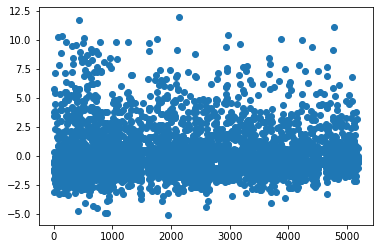

In [140]:
plt.scatter(res.resid.index,res.resid)
print(min(res.resid),np.mean(res.resid) ,max(res.resid))
plt.show()

(array([  19.,  486., 3176.,  835.,  346.,  172.,   74.,   50.,   26.,
           6.]),
 array([-5.0763086 , -3.37163786, -1.66696713,  0.03770361,  1.74237435,
         3.44704509,  5.15171582,  6.85638656,  8.5610573 , 10.26572803,
        11.97039877]),
 <BarContainer object of 10 artists>)

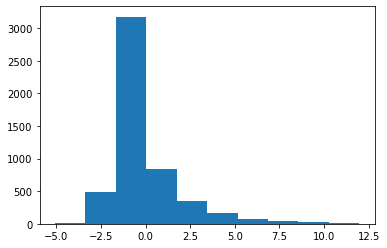

In [147]:
plt.hist(res.resid)

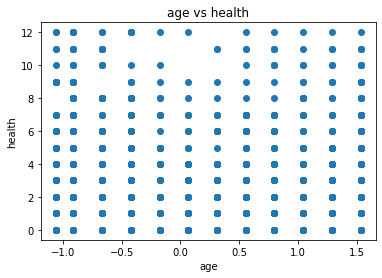

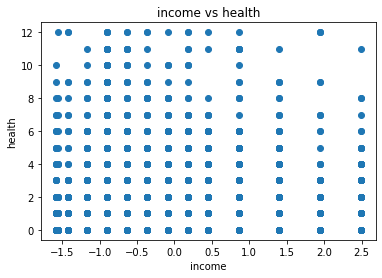

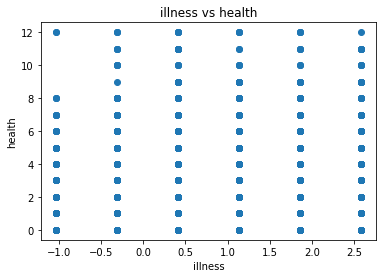

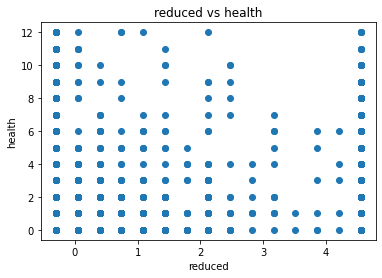

In [156]:
for col in ["age","income","illness","reduced"]:
    plt.scatter(df_health[col], df_health["health"])
    plt.title(f"{col} vs health")
    plt.xlabel(col)
    plt.ylabel("health")
    plt.show()

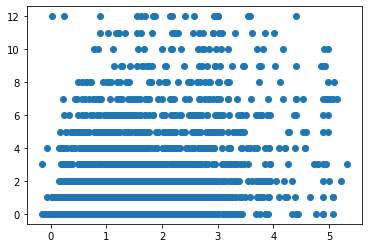

In [168]:
predictions = res.predict(feature_matrix)
plt.scatter(predictions, y)
plt.show()

In [172]:
df_health[["age","income","illness","reduced"]].cov()

age    income   illness   reduced
age      1.000193 -0.271126  0.205023  0.094763
income  -0.271126  1.000193 -0.148840 -0.047554
illness  0.205023 -0.148840  1.000193  0.218158
reduced  0.094763 -0.047554  0.218158  1.000193

In [187]:
df_scores = pd.read_csv("dat.csv")

df_scores.isna().sum()

Unnamed: 0       0
district         0
municipality     0
expreg           0
expspecial       0
expbil           0
expocc           0
exptot           0
scratio          9
special          0
lunch            0
stratio          0
income           0
score4           0
score8          40
salary          25
english          0
dtype: int64

In [188]:
#drop score 8 and fill in salary with the mean
df_scores.drop(labels="score8", axis = 1, inplace=True)
df_scores["salary"].fillna(np.mean(df_scores["salary"]), inplace = True)

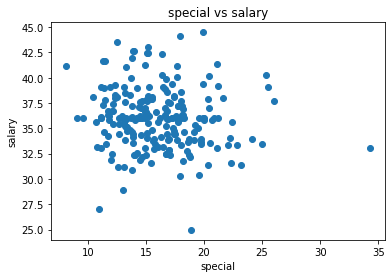

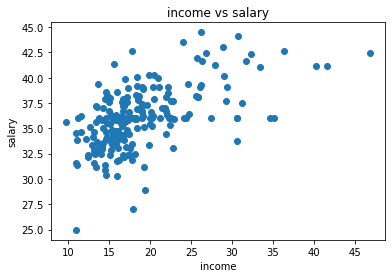

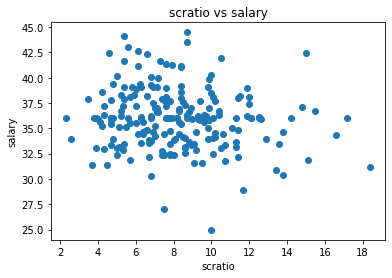

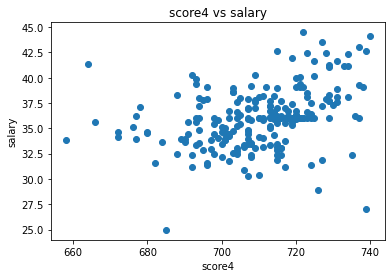

In [196]:
for col in ["special","income","score4"]:
    plt.scatter(df_scores[col], df_scores["salary"])
    plt.title(f"{col} vs salary")
    plt.xlabel(col)
    plt.ylabel("salary")
    plt.show()

6.048111253139107


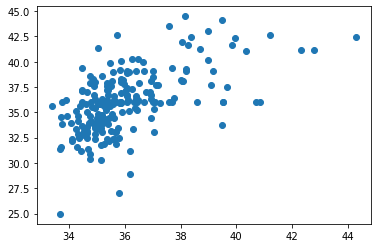

In [222]:
lr = Pipeline([("Scaler",StandardScaler()),("Linear Regression", LinearRegression())])
X = df_scores[["special","income","score4"]] 
y = df_scores["salary"]
lr.fit(X, y)
pred = lr.predict(X)
print(mean_squared_error(pred, y))
lr.
plt.scatter(pred, y)

7.048765828658441


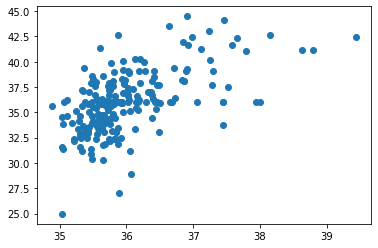

In [223]:
lr = Pipeline([("Scaler",StandardScaler()),("Linear Regression", Lasso())])
X = df_scores[["special","income","score4"]] 
y = df_scores["salary"]
lr.fit(X, y)
pred = lr.predict(X)
print(mean_squared_error(pred, y))
plt.scatter(pred, y)

6.048208840251922


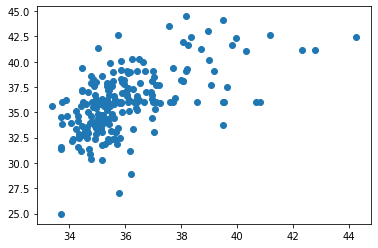

In [224]:
lr = Pipeline([("Scaler",StandardScaler()),("Linear Regression", Ridge())])
X = df_scores[["special","income","score4"]] 
y = df_scores["salary"]
lr.fit(X, y)
pred = lr.predict(X)
print(mean_squared_error(pred, y))
plt.scatter(pred, y)

In [225]:
param = {"alpha":[0.5,1,2]}
rr = GridSearchCV(Ridge(), param)
X = df_scores[["special","income","score4"]] 
y = df_scores["salary"]
rr.fit(X,y)
print(rr.best_params_)

cr = GridSearchCV(Lasso(), param)
X = df_scores[["special","income","score4"]] 
y = df_scores["salary"]
cr.fit(X,y)
print(cr.best_params_)

{'alpha': 2}
{'alpha': 1}
